# What Factors Contribute to Surviving on a Sinking Ship - A Deep Dive into the Titanic
By: Alan Powichrowski, Karan Khubdikar, Sam Fo, Sampson Yu

## Introduction

The sinking of the RMS Titanic, was one of the most tragic and known aquatic disasters to have ever occurred in maritime history - and is still constantly explore to this day. On April 1912, the RMS Titanic collided with an iceberg, which lead to its sinking and the death of over 1500 people. Every year roughly 200 people die on cruises, with the last significant maritime cruise accident being the Costa Concordia in 2012, which resulted in 32 deaths and 64 injuries. Events like this serve as an opportunity to study safety as well as human behavior and aspects relating to ones ability to survive a catastrophic event.

Numerous groups and bodies have explored the historic consequences and results of the Titanic's sinking, however, there remains a need to statistically break down and analyze the underlying factors that influence ones ability to survive a situation like this. The analysis seeks to understand the complexities surrounding individuals ability to survive a maritime disaster, using 'Paul Hendricks' Titanic data as a case study. We aim to investigate factors that contribute to understanding what elements are associated with ones ability to survive a sinking ship. To achieve appropriate results we will employ the method of Logistic Regression - a classification method used for exploring the relationships between a binary dependent or target variable (survival) and one or more independent variables of predictors (attributes of individuals on the Titanic). This approach will allow us to estimate the probability of the outcome of survival based on various input factors from the data set for each observation.on.

## Data
The data set being used in the report and which the analysis will be based on is the *Titanic Passenger Survival Data Set* data set, which is a compilation of passenger data from RMS Titanic. This data set is available and accessible through the 'titanic' library in R, or through the [Titanic GitHub repository](https://github.com/paulhendricks/titanic/tree/master). This package was created in 2015 by *Paul Hendricks*, and includes important features such as age, sex, ticket class, survival status, and many others. The data package contains two data sets one for training with 891 observations and one for testing with 418 observations, where each observations is a separate passenger from the Titanic - the data contains 12 variables defining unique characteristics of each passenger. The data set contains a breadth of variables such a personal features and socio-economic information which will be fruitful in the exploration of factors effecting ones survival.

## Methodology and Analysis

### Logistic Regression
For the analysis as mention we will be implementing a Logistic Regression model - this is a statistical method for modeling the probability of a binary outcome based on one or more predictors. In the context of our study, our binary outcome variable or target will be 'Survived' (denoted as '1' for survived and '0' for did not survive), which represents if a passenger survived the accident that occurred on the Titanic. We will be exploring the available predictors in the data set and determining which to use for the model using our reasoning with regards to what information they contribute and if they may cause multicollinearity. The predictors we will chose from are: Passenger ID, Passenger Class, Name, Sex, Age, Number of Siblings or Spouses as passenger has on board, number of Parents or Children a passenger has on board, Ticket Number, Ticket Fare, Cabin Location, ad which Port they embarked from.

Logistic Regression can be mathematically represented as:

$$log(\frac{p}{1-p})=\beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2}+\cdots+\beta_{n}X_{n}$$

Where $p$ represents the probability of an event of interest occurring which in our case is survival, $\frac{p}{1-p}$ which is the log odds of that event occurring - which we can deduce the $p$ from:

$$p=\frac{e^{log(\frac{p}{1-p})}}{1+e^{\frac{p}{1-p}}}$$

We also have $X_{1}, X_{2},\cdots,X_{n}$ are the predictor variable values, and $\beta_{0},\beta_{1},\cdots,\beta_{n}$ are the coefficients estimated by the model representing how the variables contribute to our log odds, when there is a one-unit change in the predictor. The $X$ values will be represented by the features that we define as relevant for the analysis from our data set, these will include elements such as age, sex, passenger class, etc.

### Selecting From Data Set

In applying the Logistic Regression model to the Titanic Data set we aim to explore how different variables influence the likelihood of survival. Since we are only exploring estimation and understanding the relationship between our target and the predictors we will be using the training data set provided in order to fit our model and understand the relationships between features and the target. Contextually we will also select variables that make sense logically as well as in terms of contribution to avoid multicollinearity or variables that are redundant. To start off we will be dropping the values that are unique and carry very little information that could help our model in its estimations, these will be predictors such as Passenger ID, Name of Passenger, and Ticket ID. We also want to work on a complete data set, to avoid any unnecessary assumptions being made for imputing on missing values we will drop the Cabin variable as it is very spare and has a large number of missing values - In addition to this we will be dropping the Embarking Location variable as where the passengers got onto the ship is not relevant to the analysis since they were all on the ship once the catastrophe occurred. Regarding the variables that we are keeping, we will keep Passenger Class as this represents where in the boat they were located which can reflect their ease of exit, we will include Fare as this represents socio-economic status of how much was spent on their ticket which could result in a favorable outcome for them, we kept age and sex as this relates to the idea of 'women and children first' which is known as the Birkenhead Drill and is very relevant in maritime travel, we next include Sibling/Spouse and Parent/Children count to understand how one party on the boat could affect their changes of survival.

In [2]:
# install.packages("titanic")
library(tidyverse)
library(titanic)

In [3]:
titanic_train_selected <- titanic_train[, c("Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare")]
titanic_train_selected_cleaned = na.omit(titanic_train_selected)

titanic_train_selected_cleaned$AgeGroup <- ifelse(titanic_train_selected_cleaned$Age < 13, "Child",
                                  ifelse(titanic_train_selected_cleaned$Age <= 18, "Teen",
                                         ifelse(titanic_train_selected_cleaned$Age <= 60, "Adult", "Senior")))

final_titanic_dataset <- subset(titanic_train_selected_cleaned, select = -Age)

final_titanic_dataset$Pclass <- factor(final_titanic_dataset$Pclass)
final_titanic_dataset$AgeGroup <- factor(final_titanic_dataset$AgeGroup, 
                                         levels = c("Child", "Teen", "Adult", "Senior"))

head(final_titanic_dataset)

,Survived,Pclass,Sex,SibSp,Parch,Fare,AgeGroup
,<int>,<fct>,<chr>,<int>,<int>,<dbl>,<fct>
1,0,3,male,1,0,7.2500,Adult
2,1,1,female,1,0,71.2833,Adult
3,1,3,female,0,0,7.9250,Adult
4,1,1,female,1,0,53.1000,Adult
5,0,3,male,0,0,8.0500,Adult
7,0,1,male,0,0,51.8625,Adult


In [4]:
summary(final_titanic_dataset)

    Survived      Pclass      Sex                SibSp            Parch       
 Min.   :0.0000   1:186   Length:714         Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   2:173   Class :character   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   3:355   Mode  :character   Median :0.0000   Median :0.0000  
 Mean   :0.4062                              Mean   :0.5126   Mean   :0.4314  
 3rd Qu.:1.0000                              3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000                              Max.   :5.0000   Max.   :6.0000  
      Fare          AgeGroup  
 Min.   :  0.00   Child : 69  
 1st Qu.:  8.05   Teen  : 70  
 Median : 15.74   Adult :553  
 Mean   : 34.69   Senior: 22  
 3rd Qu.: 33.38               
 Max.   :512.33               

## Exploratory Data Analysis

We will be exploring the variables and features in the data set to understand their distributions and relationships. As mentioned before we will be looking at the variable Survived, Passenger Class, Sex, Number of Siblings or Spouses, Number of Children or Parents, Fare, and Age - however, we have binned our age into groups of 0-12 as Child, 13-18 as 'Teen', 19-60 as Adult, and over 60 as Senior. We have decided to explore the distributions of the variables and understand how they relate to our target of Survival. The plots below display the distribution of Fare, how Passenger Class relates to Survival, as well as how Sex and Age Group relates to survival.


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




Warning message:
"Removed 30 rows containing missing values (`geom_bar()`)."


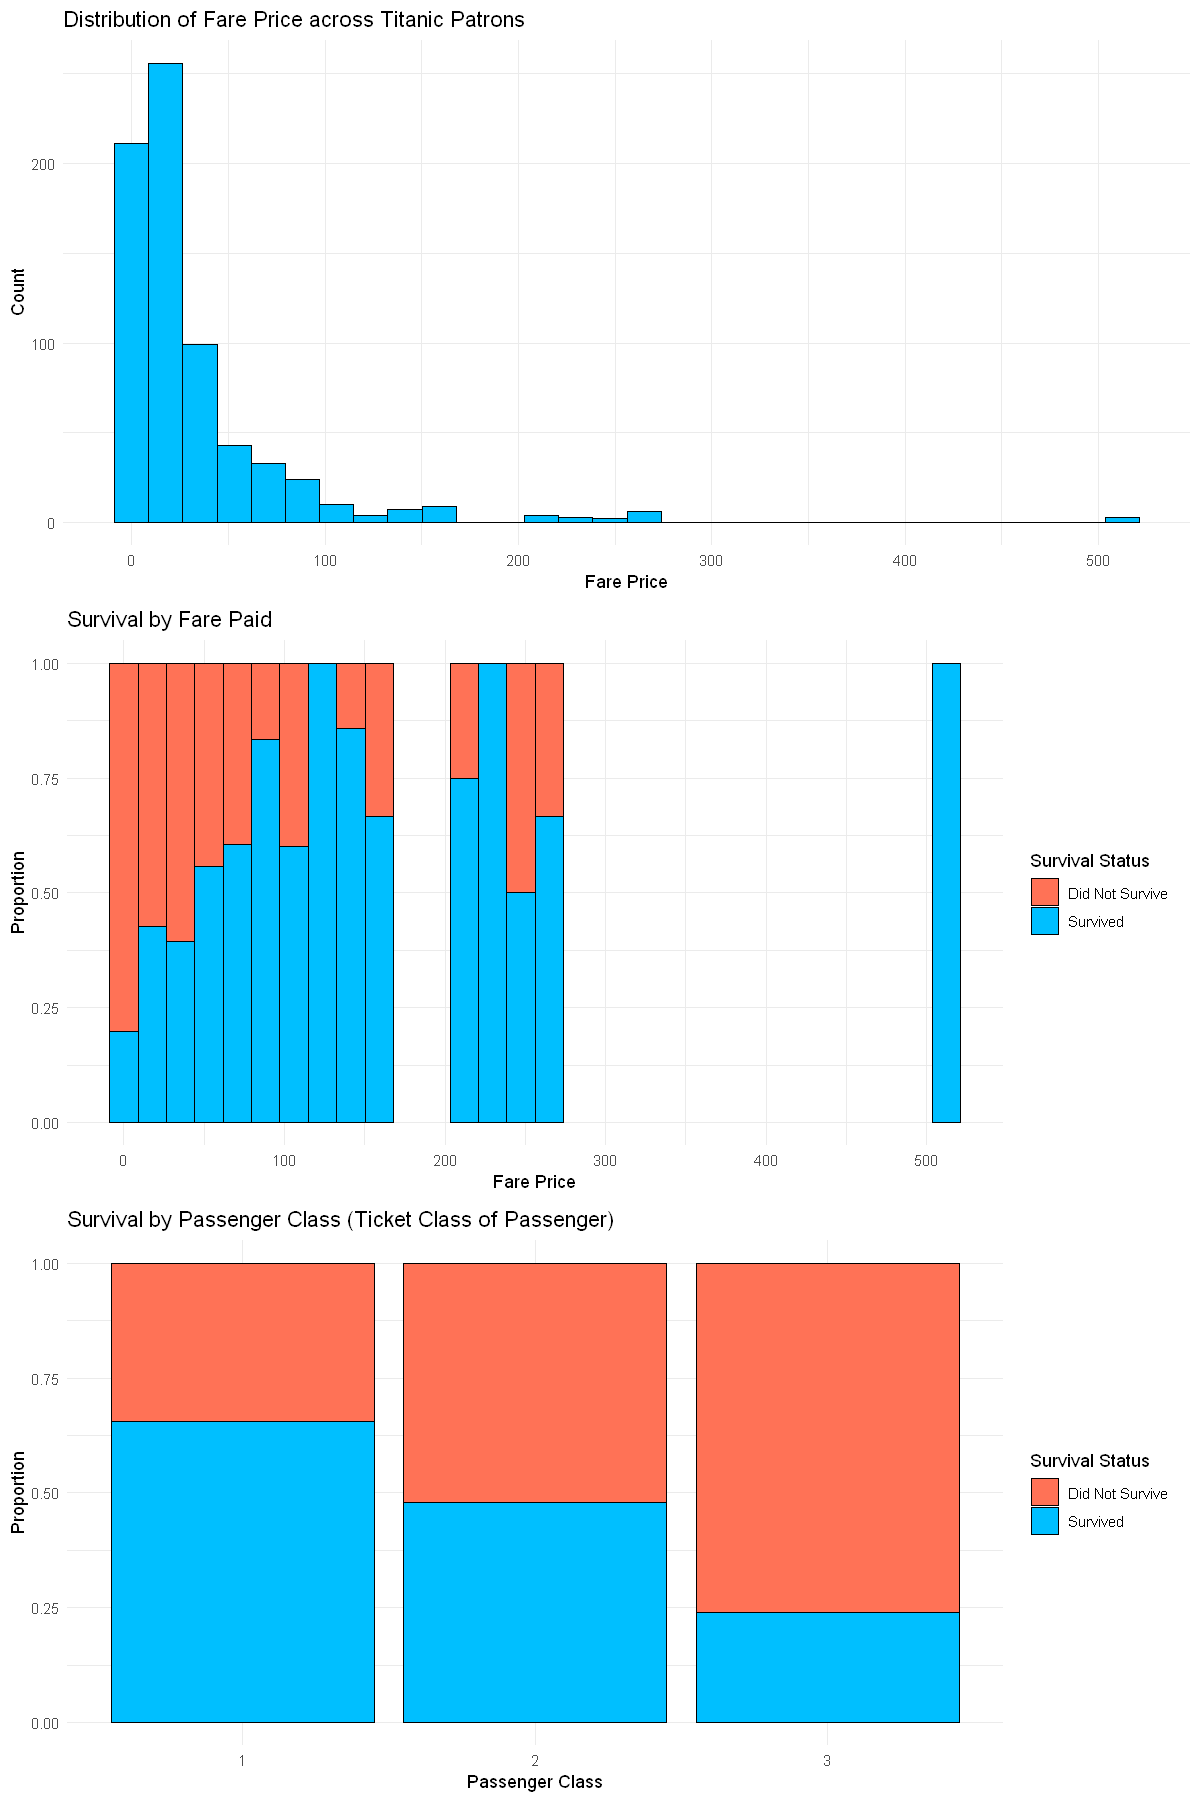

In [5]:
library(ggplot2)
library(gridExtra)

options(repr.plot.height = 15, repr.plot.width = 10)

fare_plot <- ggplot(final_titanic_dataset, aes(x = Fare)) +
  geom_histogram(bins = 30, fill = "deepskyblue", color = "black") +
  theme_minimal() +
  labs(title = "Distribution of Fare Price across Titanic Patrons", x = "Fare Price", y = "Count")

survival_by_fare_plot <- ggplot(final_titanic_dataset, aes(x = Fare, fill = factor(Survived))) +
  geom_histogram(position = "fill", bins = 30, color = "black") +
  scale_fill_manual(values = c("coral1", "deepskyblue"),
                    labels = c("Did Not Survive", "Survived"),
                    name = "Survival Status") +
  theme_minimal() +
  labs(title = "Survival by Fare Paid", x = "Fare Price", y = "Proportion")


class_plot <- ggplot(final_titanic_dataset, aes(x = Pclass, fill = factor(Survived))) +
  geom_bar(position = "fill", color = "black") +
  scale_fill_manual(values = c("coral1", "deepskyblue"), 
                    labels = c("Did Not Survive", "Survived"),
                    name = "Survival Status") +
  theme_minimal() +
  labs(title = "Survival by Passenger Class (Ticket Class of Passenger)", x = "Passenger Class", y = "Proportion")

grid.arrange(fare_plot, survival_by_fare_plot, class_plot, ncol=1)

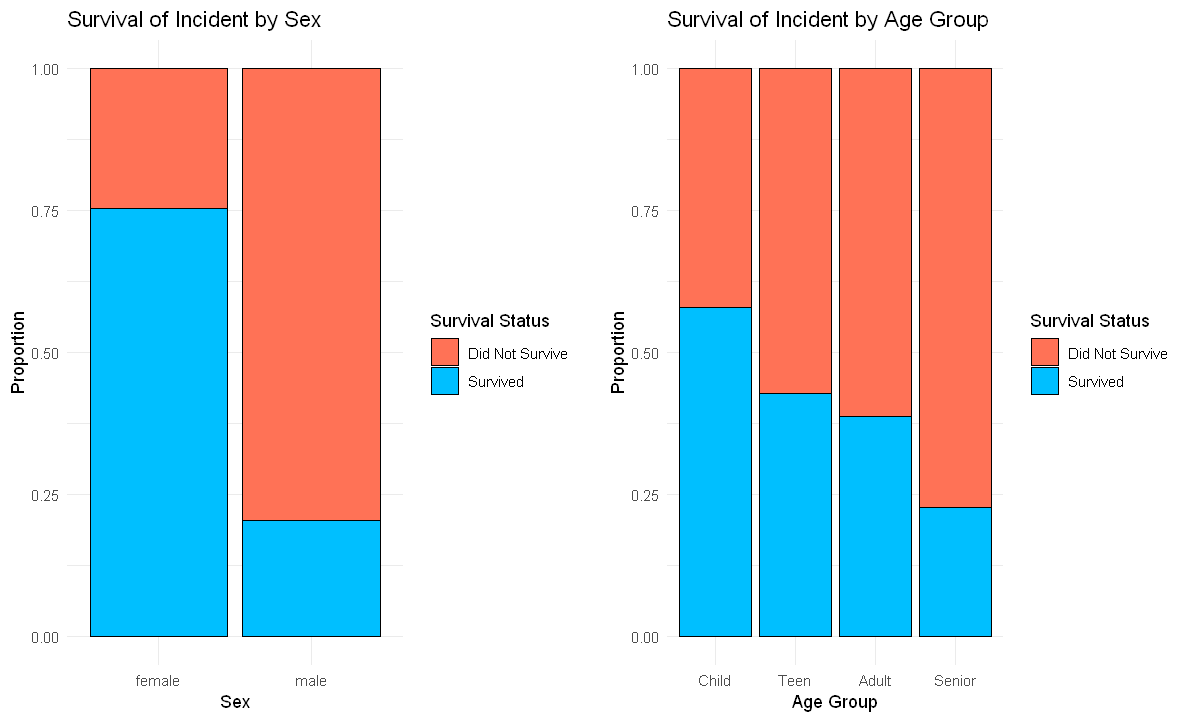

In [6]:
options(repr.plot.height = 6, repr.plot.width = 10)

sex_plot <- ggplot(final_titanic_dataset, aes(x = Sex, fill = factor(Survived))) +
  geom_bar(position = "fill", color = "black") +
  scale_fill_manual(values = c("coral1", "deepskyblue"), 
                    labels = c("Did Not Survive", "Survived"),
                    name = "Survival Status") +
  theme_minimal() +
  labs(title = "Survival of Incident by Sex", x = "Sex", y = "Proportion")

age_plot <- ggplot(final_titanic_dataset, aes(x = AgeGroup, fill = factor(Survived))) +
  geom_bar(position = "fill", color = "black") +
  scale_fill_manual(values = c("coral1", "deepskyblue"), 
                    labels = c("Did Not Survive", "Survived"),
                    name = "Survival Status") +
  theme_minimal() +
  labs(title = "Survival of Incident by Age Group", x = "Age Group", y = "Proportion")

grid.arrange(sex_plot, age_plot, ncol=2)

Looking at the plots we can see that there are a few trends to note, which could be interesting to look into when exploring our data and the relationship between the target and predictors. First we can see there is a right skew in fare price, the distribution has most counts to the left meaning a majority of patrons paid under 100 dollars for their ticket. We can then look at how this relates to Survival rate among the different classes of passengers - we can see as we traverse from 1st class to third, there are lower rates of survival, this could lead us to believe there is a relationship here and contextually it could be that the first class passengers had rooms higher up in the vessel which were safer when fleeing the boat. Next looking at Survival by Se we can see that female passengers had a much higher survival rate than those of male patrons, also looking at survival rate by age group we can see hat children had the highest survival rate while seniors had the lowest - the older you are the lower your survival rate it seems like. This EDA is very insightful and helpful for seeing that there may be relationships between our target and predictor variables - we will now move on to modeling.

## Results & Discussion of Logistic Regression

The Logistic Regression model that was fit follows the following form, with dummy variables to represent the classes from the categorical values:

$$log(\frac{p}{1-p}) = \beta_0 + \beta_{Class = 1} + \beta_{Class = 2} + \beta_{Class = 3}+ \beta_{Sex = Female} + \beta_{Sex = Male}$$  
$$+ \beta_{Count\;Sibling\;Spouse}+ \beta_{Count\;Parent\;Child} + \beta_{Fare} + \beta_{AgeGroup=Child}+ \beta_{AgeGroup=Teen} + \beta_{AgeGroup=Adult} + \beta_{AgeGroup=Senior}$$

In [7]:
final_titanic_dataset$Survived <- factor(final_titanic_dataset$Survived, levels = c(0, 1))

logistic_model <- glm(Survived ~ Pclass + Sex + SibSp + Parch + Fare + AgeGroup, 
                      data = final_titanic_dataset, family = binomial())

summary(logistic_model)


Call:
glm(formula = Survived ~ Pclass + Sex + SibSp + Parch + Fare + 
    AgeGroup, family = binomial(), data = final_titanic_dataset)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     4.836147   0.582869   8.297  < 2e-16 ***
Pclass2        -0.971070   0.312305  -3.109 0.001875 ** 
Pclass3        -2.024568   0.316878  -6.389 1.67e-10 ***
Sexmale        -2.758166   0.228698 -12.060  < 2e-16 ***
SibSp          -0.551109   0.143425  -3.842 0.000122 ***
Parch          -0.225981   0.130786  -1.728 0.084011 .  
Fare            0.004360   0.002908   1.500 0.133719    
AgeGroupTeen   -2.193787   0.524880  -4.180 2.92e-05 ***
AgeGroupAdult  -2.326278   0.420768  -5.529 3.23e-08 ***
AgeGroupSenior -3.419553   0.736218  -4.645 3.40e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 628.46  on 704  degrees

In [8]:
library(knitr)

model_summary <- summary(logistic_model)

results_table <- data.frame(
    Term = rownames(model_summary$coefficients),
    Estimate = model_summary$coefficients[, "Estimate"],
    StdError = model_summary$coefficients[, "Std. Error"],
    zValue = model_summary$coefficients[, "z value"],
    Pr = model_summary$coefficients[, "Pr(>|z|)"]
)

kable(results_table,
    format = "markdown", digits = 4,
    col.names = c("Term", "Estimate", "Standard Error", "z-value", "P-value"),
    caption = "Logistic Regression Results"
)



Table: Logistic Regression Results

|               |Term           | Estimate| Standard Error|  z-value| P-value|
|:--------------|:--------------|--------:|--------------:|--------:|-------:|
|(Intercept)    |(Intercept)    |   4.8361|         0.5829|   8.2971|  0.0000|
|Pclass2        |Pclass2        |  -0.9711|         0.3123|  -3.1094|  0.0019|
|Pclass3        |Pclass3        |  -2.0246|         0.3169|  -6.3891|  0.0000|
|Sexmale        |Sexmale        |  -2.7582|         0.2287| -12.0603|  0.0000|
|SibSp          |SibSp          |  -0.5511|         0.1434|  -3.8425|  0.0001|
|Parch          |Parch          |  -0.2260|         0.1308|  -1.7279|  0.0840|
|Fare           |Fare           |   0.0044|         0.0029|   1.4996|  0.1337|
|AgeGroupTeen   |AgeGroupTeen   |  -2.1938|         0.5249|  -4.1796|  0.0000|
|AgeGroupAdult  |AgeGroupAdult  |  -2.3263|         0.4208|  -5.5286|  0.0000|
|AgeGroupSenior |AgeGroupSenior |  -3.4196|         0.7362|  -4.6448|  0.0000|

Out base model is one with Passengers that are Female, are in First Class, and are in the age group of Child. We can now look at the results of our logistic regression model and inspect the coefficient values to understand what predictors effect the log odds and probability of someone surviving the Titanic.

The logistic regression results provide valuable insights into the factors affecting the likelihood of survival on the Titanic. Each coefficient in the table represents the log odds of survival for each unit change in the predictor, while holding all other predictors constant.

- Intercept (4.8361): This value indicates the log odds of survival when all other predictors are at their reference level. In this context, it is the baseline log odds of survival for a passenger when all other variables are zero.
- Passenger Class (Pclass2: -0.9711, Pclass3: -2.0246): These coefficients suggest that being in the 2nd or 3rd class significantly decreases the odds of survival compared to being in the 1st class. The negative values indicate that as we move from the 1st class to lower classes, the likelihood of survival decreases.
- Gender (Sexmale: -2.7582): This significant negative coefficient for male passengers indicates that being male greatly reduces the odds of survival compared to female passengers.
- Siblings/Spouses Aboard (SibSp: -0.5511): A negative coefficient implies that an increase in the number of siblings or spouses aboard decreases the survival probability.
- Parents/Children Aboard (Parch: -0.2260): Similarly, this suggests that having more parents or children aboard slightly decreases the chances of survival
- Fare (0.0044): The positive coefficient for fare implies that higher fares slightly increase the odds of survival, possibly reflecting higher socio-economic status and access to better resources.
- Age Group (Teen: -2.1938, Adult: -2.3263, Senior: -3.4196): These negative coefficients indicate that being a teenager, adult, or senior decreases the odds of survival compared to being a child. The effect is most pronounced for seniors.

## Summary of the Findings

This data analysis report focuses on identifying the factors that contributed to survival during the sinking of the RMS Titanic, using logistic regression analysis. The Titanic dataset contains information about passengers such as age, sex, ticket class, and survival status. The analysis aims to pinpoint specific attributes that influenced the likelihood of survival.

- Passenger Class: There's a clear negative correlation between passenger class and survival probability. Passengers in lower classes (2nd and 3rd) had significantly lower odds of surviving compared to those in 1st class.
- Gender: Female passengers had a much higher chance of survival than male passengers.
- Age: Age groups also played a critical role. Children had a higher survival rate, while seniors had the lowest.
- Socio-Economic Status: Represented by fare, it had a lesser impact on survival probability.

In summary, the analysis provides a detailed understanding of the factors influencing survival on the Titanic. Class and gender emerged as the most significant factors, followed by age. These findings highlight the social hierarchies and norms of the time, where women and children, particularly from higher social classes, were given priority during rescue efforts. Such analyses not only shed light on historical events but also offer valuable insights for modern maritime safety and disaster management strategies.